In [61]:

import pandas as pd
# import sys  
# sys.path.insert(0, '../python/')

# import file
# !ln -s ../python/plot_helper.py plot_helper.py
from plot_helper import plotting

#!ln -s ../python/data_format.py data_format1.py
from data_format1 import data_format

d=data_format()
p=plotting()
file='../Timing Analysis/ad_Aug1_advertiser_time.csv'
df=pd.read_csv(file)

df=df.drop(['Unnamed: 0','campaign_name', 'adset_name', 'ad_name','inline_link_click_ctr', 'inline_post_engagement',
       'instant_experience_clicks_to_open',
       'instant_experience_clicks_to_start',
       'instant_experience_outbound_clicks', 'interactive_component_tap_value',
       'objective', 'outbound_clicks_outbound_click',
       'outbound_clicks_ctr_outbound_click','updated_time','website_ctr_link_click'],axis=1)



In [62]:
df=df.rename(columns={'cost_per_action_type_video_view':'cpa_video_view'})
df=df.rename(columns={'cost_per_action_type_link_click':'cpa_link_click'})
df=df.rename(columns={'cost_per_action_type_onsite_conversion.post_save':'cpa_on_conv'})
df=df.rename(columns={'cost_per_action_type_omni_activate_app':'cpa_all_act_app'})
df=df.rename(columns={'cost_per_action_type_post_engagement':'cpa_post_eng'})
df=df.rename(columns={'cost_per_action_type_page_engagement':'cpa_pg_eng'})
df=df.rename(columns={'cost_per_action_type_omni_app_install':'cpa_all_app_install'})
df=df.rename(columns={'cost_per_inline_link_click':'cpinl_link_click'})
df=df.rename(columns={'cost_per_inline_post_engagement':'cpinl_post_eng'})
df=df.rename(columns={'cost_per_outbound_click_outbound_click':'cpo_click'})
df=df.rename(columns={'hourly_stats_aggregated_by_advertiser_time_zone':'time'})
#data1['conversions']=df1.unique_actions_mobile_app_install

# #data1['CR']=round((data1.conversions/data1.clicks) *100, 2)
df['CTR']=round((df.clicks / df.impressions) * 100,4)
df['CPC']= round(df.spend / df.clicks,2)
# #data1['costPerCon'] = round(data1.spend / data1.conversions, 2)
df['CPM'] = round((df.spend / df.impressions) * 1000, 2)

df.head()

,campaign_id,adset_id,ad_id,clicks,cpa_link_click,cpa_on_conv,cpa_all_act_app,cpa_post_eng,cpa_pg_eng,cpa_all_app_install,...,cpo_click,impressions,spend,date_start,date_stop,time,cpa_video_view,CTR,CPC,CPM
0,23845309179470180,23845309179490180,23845309179510180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,...,0.251964,4083,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,4.1146,0.25,10.37
1,23845314022210180,23845314039500180,23845314039460180,0,NaN,0.42,NaN,0.035000,0.035000,NaN,...,NaN,45,0.42,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.038182,0.0000,inf,9.33
2,23845314022210180,23845314039500180,23845314039480180,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6,0.03,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,0.0000,inf,5.00
3,23845314022210180,23845314039500180,23845314039510180,0,NaN,NaN,NaN,0.073333,0.073333,NaN,...,NaN,38,0.22,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.073333,0.0000,inf,5.79
4,23845314118080180,23845314118190180,23845314118100180,1,0.080000,NaN,NaN,0.080000,0.080000,NaN,...,0.080000,7,0.08,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,14.2857,0.08,11.43


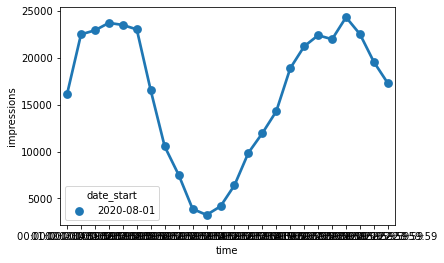

In [63]:
# the analysis should be by date not time but ok 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

grouped = pd.DataFrame(df.groupby(['time','date_start'])['impressions'].sum().reset_index())
sns.pointplot(x='time', y='impressions', hue='date_start', data=grouped)

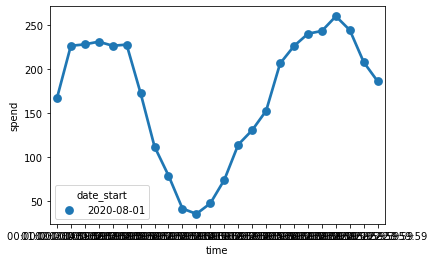

In [64]:
grouped = pd.DataFrame(df.groupby(['time','date_start'])['spend'].sum().reset_index())
sns.pointplot(x='time', y='spend', hue='date_start', data=grouped)

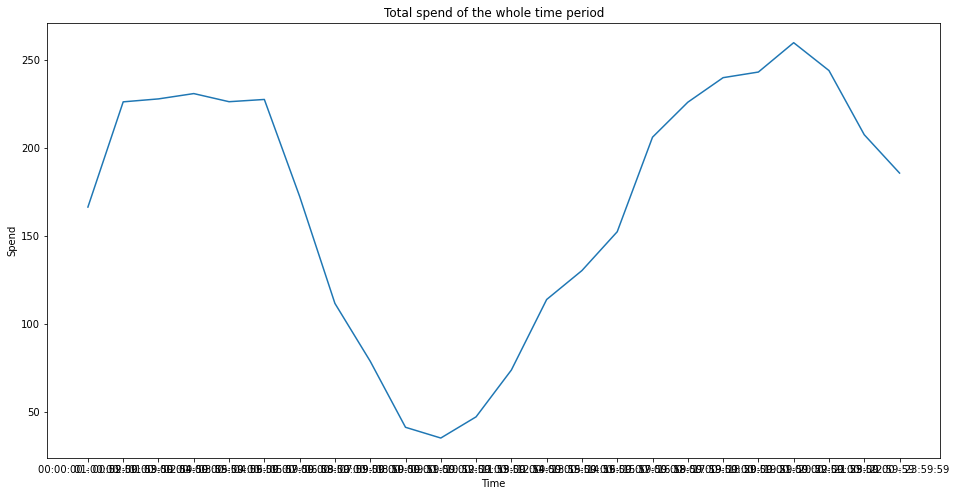

In [65]:
ts=df.groupby(["time"])["spend"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total spend of the whole time period')
plt.xlabel('Time')
plt.ylabel('Spend')
plt.plot(ts);

count    534.000000
mean       7.629288
std       20.054125
min        0.000000
25%        0.070000
50%        1.300000
75%        3.440000
max      120.899319
Name: spend, dtype: float64

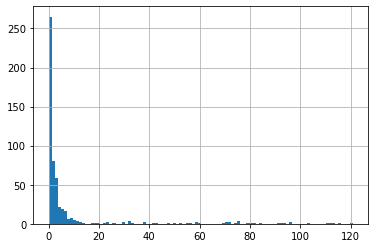

In [66]:
df.spend.hist(bins=100)
df.spend.describe()


In [67]:
# Aggregate to monthly level the sales
monthly_spend=df.groupby(["time","ad_id","adset_id"])[
    "time","spend"].agg({"time":["min",'max'],"spend":"mean"})

monthly_spend.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



time  \
                                                                         min   
time                ad_id             adset_id                                 
00:00:00 - 00:59:59 23845309179510180 23845309179490180  00:00:00 - 00:59:59   
                    23845314039460180 23845314039500180  00:00:00 - 00:59:59   
                    23845314039480180 23845314039500180  00:00:00 - 00:59:59   
                    23845314039510180 23845314039500180  00:00:00 - 00:59:59   
                    23845314118100180 23845314118190180  00:00:00 - 00:59:59   

                                                                              \
                                                                         max   
time                ad_id             adset_id                                 
00:00:00 - 00:59:59 23845309179510180 23845309179490180  00:00:00 - 00:59:59   
                    23845314039460180 23845314039500180  00:00:00 - 00:59:59   
                    23845314039480180 23845314039500180  00:00:00 - 00:59:59   
                    23845314039510180 23845314039500180  00:00:00 - 00:59:59   
                    23845314118100180 23845314118190180  00:00:00 - 00:59:59   

                                                         spend  
                                                          mean  
time                ad_id             adset_id                  
00:00:00 - 00:59:59 23845309179510180 23845309179490180  42.33  
                    23845314039460180 23845314039500180   0.42  
                    23845314039480180 23845314039500180   0.03  
                    23845314039510180 23845314039500180   0.22  
                    23845314118100180 23845314118190180   0.08

In [68]:
spend_data_flat = monthly_spend.spend.apply(list).reset_index()
#Keep only the test data of valid
spend_data_flat = pd.merge(df,spend_data_flat,on = ['ad_id','adset_id'],how = 'left')
#fill na with 0
spend_data_flat.fillna(0,inplace = True)
spend_data_flat.drop(['ad_id','adset_id'],inplace = True, axis = 1)
spend_data_flat.head(20)

,campaign_id,clicks,cpa_link_click,cpa_on_conv,cpa_all_act_app,cpa_post_eng,cpa_pg_eng,cpa_all_app_install,cpinl_link_click,cpinl_post_eng,...,spend,date_start,date_stop,time_x,cpa_video_view,CTR,CPC,CPM,time_y,mean
0,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,00:00:00 - 00:59:59,42.33
1,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,01:00:00 - 01:59:59,71.62
2,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,02:00:00 - 02:59:59,74.99
3,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,03:00:00 - 03:59:59,75.94
4,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,04:00:00 - 04:59:59,71.57
5,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,05:00:00 - 05:59:59,75.80
6,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,06:00:00 - 06:59:59,58.97
7,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,07:00:00 - 07:59:59,38.56
8,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,08:00:00 - 08:59:59,26.25
9,23845309179470180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,0.251964,0.246105,...,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.0,4.1146,0.25,10.37,09:00:00 - 09:59:59,11.90


In [69]:
#We will create pivot table.
# Rows = each shop+item code
# Columns will be out time sequence
pivoted_sales = spend_data_flat.pivot_table(index='campaign_id', columns='time_x',fill_value = 0,aggfunc='sum' )
pivoted_sales.head(20)

CPC                                          \
time_x              0 00:00:00 - 00:59:59 01:00:00 - 01:59:59   
campaign_id                                                     
23845309179470180   0                 inf               42.66   
23845314022210180   0                 inf               41.18   
23845314118080180   0                 inf                 inf   
23845339146020180   0                0.00                0.00   
23845399708880180   0               15.42               10.48   
23845411159500180   0                0.00                0.00   
23845456288210180   0                0.00                0.00   
23845468874450180   0                0.00                0.00   
23845475824840180   0                0.00                0.00   
23845481811500180   0                0.00                0.00   
23845502516410180   0                0.00                0.00   
23845570426090180   0                0.00                0.00   
23845578892300180   0                0.00                0.00   
23845580845570180   0                0.00                0.00   
23845617952880180   0                0.00                0.00   
23845629612600180   0                0.00                0.00   
23845646017730180   0                0.00                0.00   
23845647567410180   0                0.00                0.00   
23845647567430180   0                0.00                0.00   
23845669562260180   0                0.00                0.00   

                                                                               \
time_x            02:00:00 - 02:59:59 03:00:00 - 03:59:59 04:00:00 - 04:59:59   
campaign_id                                                                     
23845309179470180               52.54                 inf               36.25   
23845314022210180                 inf                 inf                 inf   
23845314118080180                 inf               64.04                 inf   
23845339146020180                0.00                0.00                0.00   
23845399708880180               24.24               15.70               15.68   
23845411159500180                0.00                0.00                0.00   
23845456288210180                0.00                0.00                0.00   
23845468874450180                0.00                0.00                0.00   
23845475824840180                0.00                0.00                0.00   
23845481811500180                0.00                0.00                0.00   
23845502516410180                0.00                0.00                0.00   
23845570426090180                0.00                0.00                0.00   
23845578892300180                0.00                0.00                0.00   
23845580845570180                0.00                0.00                0.00   
23845617952880180                0.00                0.00                0.00   
23845629612600180                0.00                0.00                0.00   
23845646017730180                0.00                0.00                0.00   
23845647567410180                0.00                0.00                0.00   
23845647567430180                0.00                0.00                0.00   
23845669562260180                0.00                0.00                0.00   

                                                                               \
time_x            05:00:00 - 05:59:59 06:00:00 - 06:59:59 07:00:00 - 07:59:59   
campaign_id                                                                     
23845309179470180               37.26               41.20                 inf   
23845314022210180                 inf               28.87               41.47   
23845314118080180                 inf                 inf                 inf   
23845339146020180                0.00                0.00                0.00   
23845399708880180               34.80               14.32                6.76   
2384541115

In [70]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(pivoted_sales.values[:,:-1],axis = 2)
# the last column is our prediction
y_train = pivoted_sales.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(pivoted_sales.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)


(60, 424, 1) (60, 1) (60, 424, 1)


In [71]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.models import load_model, Model

# our defining sales model 
sales_model = Sequential()
sales_model.add(LSTM(units = 64,input_shape = (33,1)))
sales_model.add(Dropout(0.5))
sales_model.add(Dense(1))

sales_model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
sales_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [72]:
sales_model.fit(X_train,y_train,batch_size = 4096,epochs = 20)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 255238.9688 - mean_squared_error: 255238.9688
Epoch 2/20
1/1 [==============================] - 0s 261ms/step - loss: nan - mean_squared_error: nan
Epoch 3/20
1/1 [==============================] - 0s 260ms/step - loss: nan - mean_squared_error: nan
Epoch 4/20
1/1 [==============================] - 0s 258ms/step - loss: nan - mean_squared_error: nan
Epoch 5/20
1/1 [==============================] - 0s 271ms/step - loss: nan - mean_squared_error: nan
Epoch 6/20
1/1 [==============================] - 0s 256ms/step - loss: nan - mean_squared_error: nan
Epoch 7/20
1/1 [==============================] - 0s 258ms/step - loss: nan - mean_squared_error: nan
Epoch 8/20
1/1 [==============================] - 0s 255ms/step - loss: nan - mean_squared_error: nan
Epoch 9/20
1/1 [==============================] - 0s 256ms/step - loss: nan - mean_squared_error: nan
Epoch 10/20
1/1 [==============================] - 0s 252ms/step - lo

In [73]:
submission_output = sales_model.predict(X_test)
submission = pd.DataFrame({'campaign_id':spend_data_flat['campaign_id'],'spend':submission_output.ravel()})

#submission.to_csv('submission_stacked.csv',index = False)
submission.head()

ValueError: array length 60 does not match index length 7816

In [74]:
from statsmodels.tsa.stattools import adfuller

In [75]:
test_stationarity=adfuller(df['spend'])

In [76]:
test_stationarity

(-2.6153508269119863,
 0.0898658870618787,
 16,
 517,
 {'1%': -3.443061925077973,
  '5%': -2.8671466525252014,
  '10%': -2.5697561378507907},
 4380.022274867099)

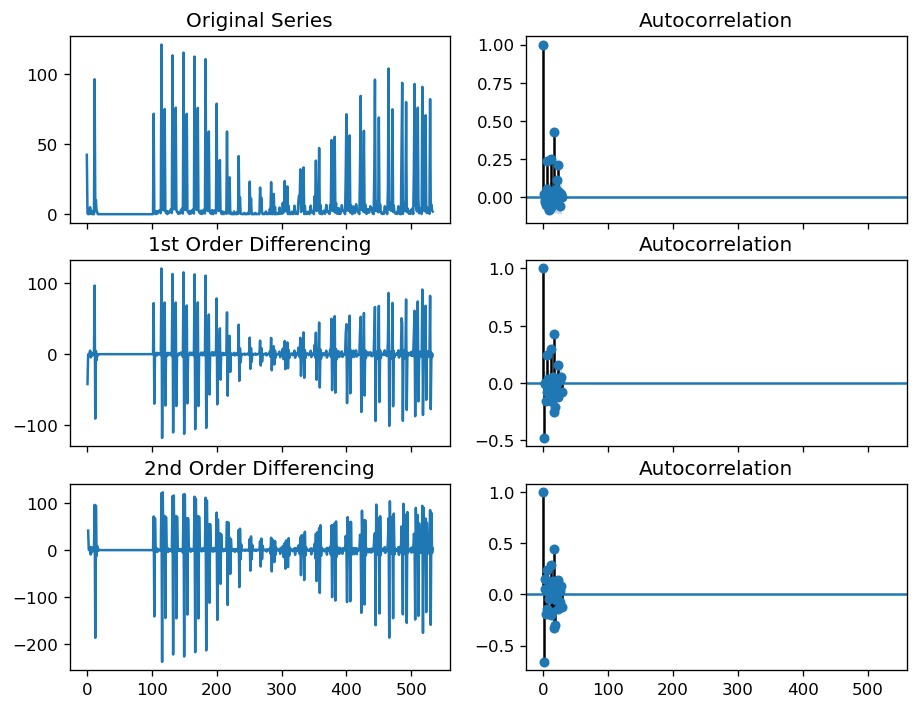

In [77]:
#find the d term
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.spend); axes[0, 0].set_title('Original Series')
plot_acf(df.spend, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.spend.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.spend.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.spend.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.spend.diff().diff().dropna(), ax=axes[2, 1])


plt.show()

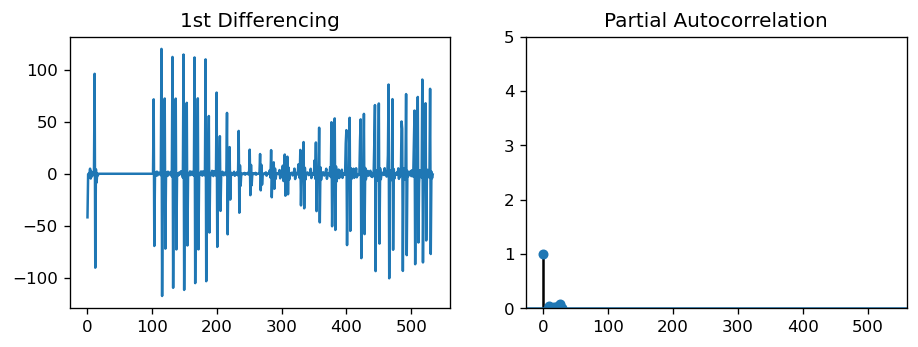

In [78]:
# PACF plot of 1st differenced series
#find the p term 
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.spend.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.spend.diff().dropna(), ax=axes[1])

plt.show()

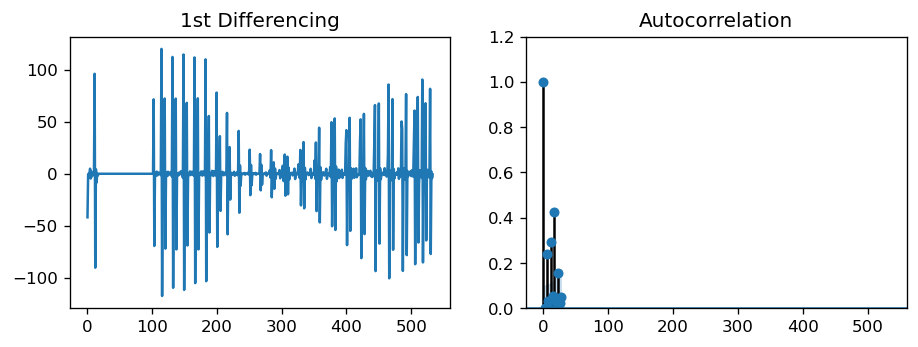

In [79]:
#find m term
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.spend.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.spend.diff().dropna(), ax=axes[1])

plt.show()

In [45]:
df['half_day_difference']=df.spend -df.spend.shift(12)
test_stationarity=adfuller(df['half_day_difference'].dropna())
test_stationarity

(-11.803263631144345,
 9.22297861429028e-22,
 19,
 513,
 {'1%': -3.443161545965353,
  '5%': -2.8671904981615706,
  '10%': -2.5697795041589244},
 4360.834344032621)

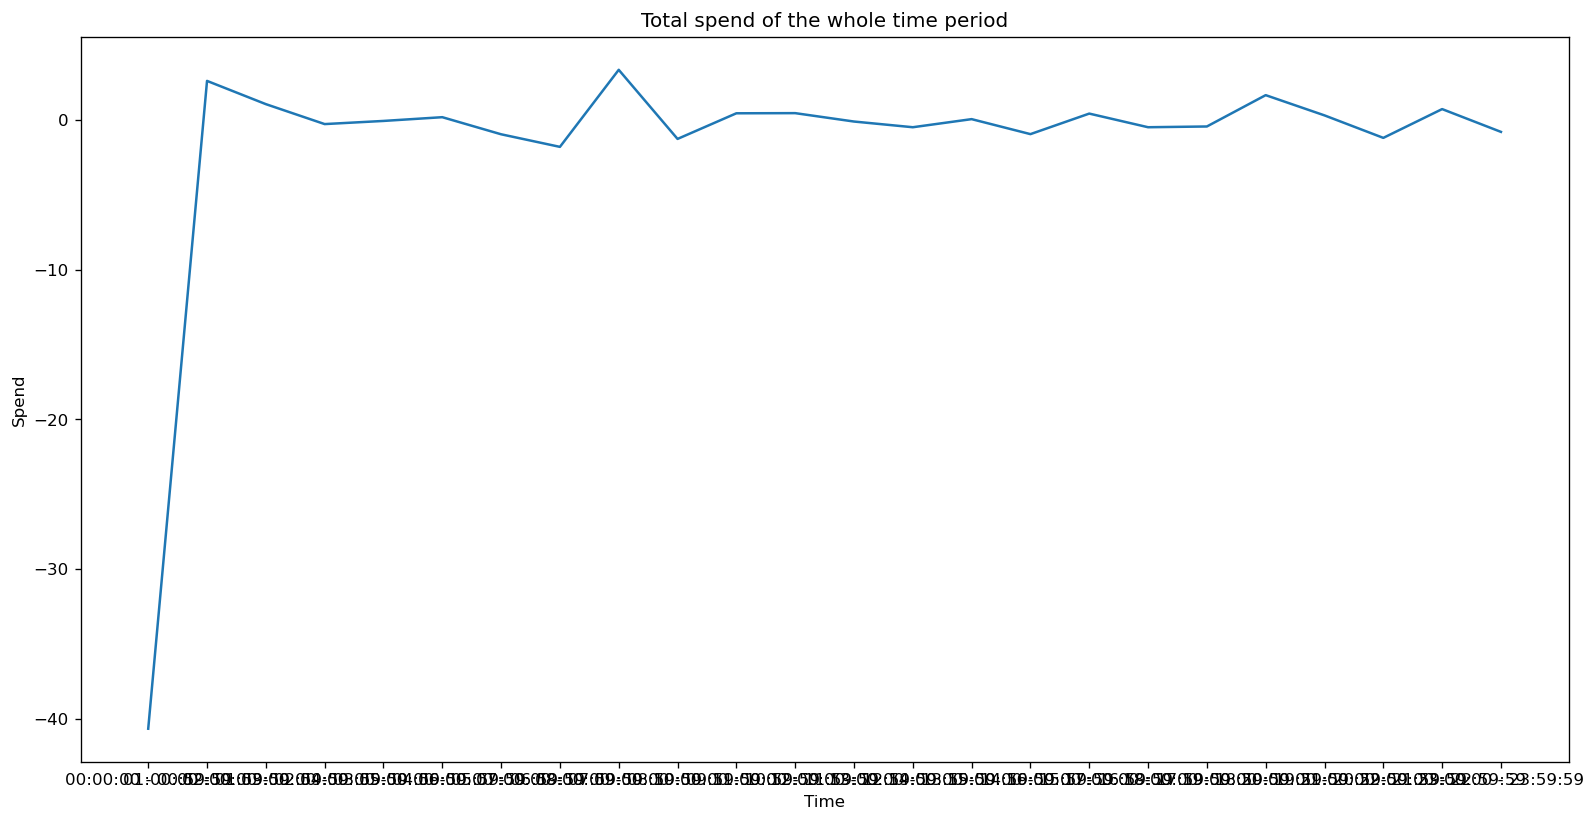

In [46]:
ts=df.groupby(["time"])["half_day_difference"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total spend of the whole time period')
plt.xlabel('Time')
plt.ylabel('Spend')
plt.plot(ts);

In [48]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['half_day_difference'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()


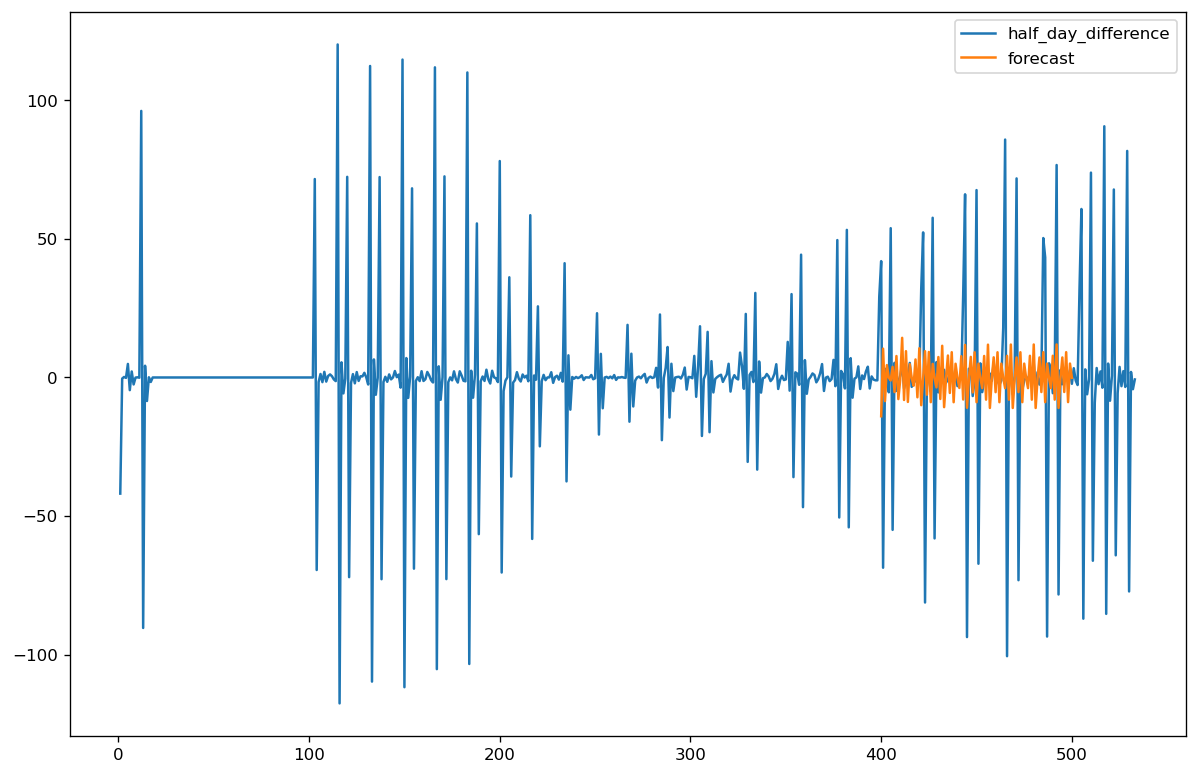

In [50]:
df['forecast']=results.predict(start=400,end=500,dynamic=True)
df[['half_day_difference','forecast']].plot(figsize=(12,8))